<a href="https://colab.research.google.com/github/dsi-project5/project-5/blob/master/Project5_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from google.cloud import bigquery

## Read in Data

In [2]:
# Load data from csv
accidents_df = pd.read_csv('./US_Accidents_Dec20.csv')

In [3]:
pd.set_option('display.max_columns',150)

In [4]:
 # Check the dataframe
accidents_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Columns and data types
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229394 entries, 0 to 4229393
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
# Describe the data
accidents_df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.229394e+06,4.229394e+06,4.229394e+06,1.512917e+06,1.512917e+06,4.229394e+06,1.543203e+06,4.139611e+06,2.333523e+06,4.134048e+06,4.153106e+06,4.130837e+06,3.750182e+06,2.163992e+06
mean,2.083517e+02,2.305236e+00,3.639841e+01,-9.546515e+01,3.690330e+01,-9.860820e+01,3.353485e-01,6.139651e+03,6.148234e+01,5.489414e+01,6.567190e+01,2.969388e+01,9.112037e+00,7.904503e+00,1.246012e-02
std,2.124413e+01,5.333263e-01,4.963930e+00,1.735298e+01,5.164553e+00,1.849664e+01,1.601457e+00,1.491765e+04,1.852592e+01,2.272745e+01,2.272347e+01,8.638412e-01,2.817529e+00,5.330603e+00,1.638251e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352079e+01,-1.173571e+02,3.385431e+01,-1.182087e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582550e+01,-9.002164e+01,3.735409e+01,-9.440530e+01,0.000000e+00,2.889000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018360e+01,-8.084707e+01,4.072622e+01,-8.087582e+01,8.800000e-02,7.327000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [7]:
# Check for NULL values
accidents_df.isnull().sum()

ID                             0
Source                         0
TMC                      1512917
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2686191
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1291
Country                        0
Timezone                    4609
Airport_Code                8961
Weather_Timestamp          62553
Temperature(F)             89783
Wind_Chill(F)            1895871
Humidity(%)                95346
Pressure(in)               76288
Visibility(mi)             98557
Wind_Direction             83496
Wind_Speed(mph)           479212
Precipitat

In [8]:
# Check frequent values for TMC to fill for NULL
accidents_df['TMC'].value_counts()

201.0    2264385
241.0     284371
245.0      51670
229.0      23171
203.0      18536
222.0      13611
244.0      13101
406.0      12815
246.0       9019
343.0       8073
202.0       6483
247.0       4806
236.0       2123
206.0       1370
248.0       1025
339.0       1020
341.0        674
336.0         98
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

## Data Cleaning

In [9]:
accidents_df['TMC'].fillna(201.0, inplace=True)

In [10]:
accidents_df['TMC'].value_counts()

201.0    3777302
241.0     284371
245.0      51670
229.0      23171
203.0      18536
222.0      13611
244.0      13101
406.0      12815
246.0       9019
343.0       8073
202.0       6483
247.0       4806
236.0       2123
206.0       1370
248.0       1025
339.0       1020
341.0        674
336.0         98
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [11]:
accidents_df['TMC'].isnull().sum()

0

In [12]:
# Too many NULLs for End_Lat and End_Lng, so drop them. We can get most details using Start_Lat and Start_Lng anyway
accidents_df.drop(columns=['End_Lat', 'End_Lng'], inplace=True)

In [13]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229394 entries, 0 to 4229393
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
# Drop all address related columns as we can derive it from Lat and Lng fields
accidents_df.drop(columns=['Number'], inplace=True)
#'Street', 'City', 'County', 'State', 'Zipcode', 'Country'], inplace=True)

In [15]:
# Drop Timezone as we won't be using it in our model and not needed for any EDA as well. Again, we could derive most of it using Lat/Lng
# Similarly, drop Airport_Code as well as it'll be multi-collinear with lat/lng. 
accidents_df.drop(columns=['Timezone', 'Airport_Code'], inplace=True)

In [16]:
accidents_df.loc[:,['Weather_Timestamp', 'Start_Time', 'End_Time']].head(10)

,Weather_Timestamp,Start_Time,End_Time
0,2016-02-08 05:58:00,2016-02-08 05:46:00,2016-02-08 11:00:00
1,2016-02-08 05:51:00,2016-02-08 06:07:59,2016-02-08 06:37:59
2,2016-02-08 06:56:00,2016-02-08 06:49:27,2016-02-08 07:19:27
3,2016-02-08 07:38:00,2016-02-08 07:23:34,2016-02-08 07:53:34
4,2016-02-08 07:53:00,2016-02-08 07:39:07,2016-02-08 08:09:07
5,2016-02-08 07:51:00,2016-02-08 07:44:26,2016-02-08 08:14:26
6,2016-02-08 07:56:00,2016-02-08 07:59:35,2016-02-08 08:29:35
7,2016-02-08 07:56:00,2016-02-08 07:59:58,2016-02-08 08:29:58
8,2016-02-08 07:58:00,2016-02-08 08:00:40,2016-02-08 08:30:40
9,2016-02-08 08:28:00,2016-02-08 08:10:04,2016-02-08 08:40:04


In [17]:
# Check if any Weather_Timestamp is outside of Start_Time and End_Time
accidents_df[(accidents_df['Weather_Timestamp'] < accidents_df['Start_Time']) & (accidents_df['Weather_Timestamp'] > accidents_df['End_Time'])]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [18]:
# Based on the above, Weather_Timestamp is **always** between Start_Time and End_Time so we can safely drop it
accidents_df.drop(columns=['Weather_Timestamp'], inplace=True)

In [19]:
accidents_df['Temperature(F)'].value_counts()

 68.0     91496
 77.0     90001
 59.0     86294
 73.0     84159
 63.0     80015
          ...  
-23.4         1
 168.8        1
 127.0        1
 140.0        1
-32.8         1
Name: Temperature(F), Length: 840, dtype: int64

In [20]:
accidents_df['Temperature(F)'].describe()

count    4.139611e+06
mean     6.148234e+01
std      1.852592e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.300000e+01
75%      7.520000e+01
max      2.030000e+02
Name: Temperature(F), dtype: float64

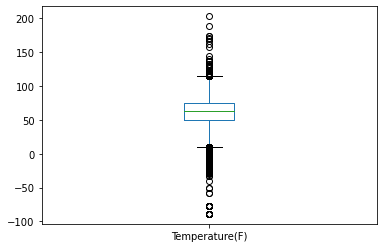

In [21]:
accidents_df['Temperature(F)'].plot(kind='box');

In [22]:
# Find out mean and median of Temperature so we can fill it for NULL values
print(accidents_df['Temperature(F)'].mean())
print(accidents_df['Temperature(F)'].median())

61.4823393550751
63.0


In [23]:
# Fill the median value for NULL values
accidents_df['Temperature(F)'].fillna(accidents_df['Temperature(F)'].median(), inplace=True)

In [24]:
accidents_df['Wind_Chill(F)'].value_counts()

 73.0     47731
 63.0     46737
 64.0     45719
 72.0     44168
 75.0     43894
          ...  
-52.1         1
-44.4         1
-40.6         1
-29.4         1
 127.0        1
Name: Wind_Chill(F), Length: 984, dtype: int64

In [25]:
accidents_df['Wind_Chill(F)'].describe()

count    2.333523e+06
mean     5.489414e+01
std      2.272745e+01
min     -8.900000e+01
25%      3.800000e+01
50%      5.800000e+01
75%      7.300000e+01
max      1.890000e+02
Name: Wind_Chill(F), dtype: float64

In [26]:
# Since Wind Chill is associated with Wind_Speed and Wind_Direction, lets check those values
accidents_df['Wind_Direction'].value_counts()

CALM        377976
Calm        368269
SSW         208937
WNW         204047
SW          197598
NW          197594
SSE         193071
WSW         190865
NNW         178909
South       177228
West        164619
SE          157153
North       153256
S           150915
NE          144269
NNE         143663
ENE         142142
ESE         140335
W           135499
Variable    113896
N           112962
East        103459
E           101485
VAR          87751
Name: Wind_Direction, dtype: int64

In [27]:
# Based on the values of Wind_Direction, i don't think it'll be useful for our analysis. So, dropping that field completely.
#accidents_df.drop(columns=['Wind_Direction'], inplace=True)

In [28]:
accidents_df['Wind_Speed(mph)'].value_counts()

0.0      377984
4.6      217441
5.8      215966
3.5      203421
6.9      201261
          ...  
141.5         1
471.8         1
157.0         1
54.0          1
77.1          1
Name: Wind_Speed(mph), Length: 162, dtype: int64

In [29]:
accidents_df['Wind_Speed(mph)'].describe()

count    3.750182e+06
mean     7.904503e+00
std      5.330603e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      9.840000e+02
Name: Wind_Speed(mph), dtype: float64

In [30]:
# Normally, temp, wind chill and wind speed are related in that wind chill is (temp - x*wind_speed) where x is simply 1 or some factor of it
# Lets check values here
accidents_df.loc[:,['Temperature(F)', 'Wind_Speed(mph)', 'Wind_Chill(F)']].head(15)

,Temperature(F),Wind_Speed(mph),Wind_Chill(F)
0,36.9,NaN,NaN
1,37.9,NaN,NaN
2,36.0,3.5,33.3
3,35.1,4.6,31.0
4,36.0,3.5,33.3
5,37.9,3.5,35.5
6,34.0,3.5,31.0
7,34.0,3.5,31.0
8,33.3,1.2,NaN
9,37.4,4.6,33.8


In [31]:
# Above results confirms that theory. We can go ahead and calculate Wind_Chill(F) based on Wind_Speed(mph)
# If both Wind_Chill(F) and Wind_Speed(mph) are NULL, then we can use the Temperatur(F) instead assuming there is NO wind
# Finally, Wind_Speed(mph) is already part of Wind_Chill(F), we can drop that column.
# You could argue that Wind_Chill and Temp has linear relationship as they both mostly has similar values 
# but thats not always the case. So, we'll keep both of them and check for multi-collinearity when evaluating the model.

# First fill Wind_Chill using Wind_Speed where Wind_Chill = Temp-WindSpeed
accidents_df['Wind_Chill(F)'] = accidents_df.apply(lambda row: row['Temperature(F)'] - row['Wind_Speed(mph)'] if np.isnan(row['Wind_Chill(F)']) else row['Wind_Chill(F)'], axis=1)


In [32]:
# Now, we're left with rows where wind_speed is also NULL. Fill in with temperature values
accidents_df['Wind_Chill(F)'] = accidents_df.apply(lambda row: row['Temperature(F)'] if np.isnan(row['Wind_Chill(F)']) else row['Wind_Chill(F)'], axis=1)

In [33]:
# Drop Wind_Speed column as its captured in Wind_Chill already
accidents_df.drop(columns=['Wind_Speed(mph)'], inplace=True)

In [34]:
# We filled most NULLs. Lets check where we stand now
accidents_df.isnull().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    2
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1291
Country                        0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                95346
Pressure(in)               76288
Visibility(mi)             98557
Wind_Direction             83496
Precipitation(in)        2065402
Weather_Condition          98282
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit   

In [35]:
accidents_df['Humidity(%)'].value_counts()

100.0    170092
93.0     164814
90.0      97078
87.0      95814
89.0      81384
          ...  
5.0        2369
4.0        1272
3.0         305
2.0         100
1.0          13
Name: Humidity(%), Length: 100, dtype: int64

In [36]:
accidents_df['Humidity(%)'].describe()

count    4.134048e+06
mean     6.567190e+01
std      2.272347e+01
min      1.000000e+00
25%      4.900000e+01
50%      6.800000e+01
75%      8.500000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64

In [37]:
accidents_df['Weather_Condition'].value_counts()

Fair                         899305
Clear                        808181
Mostly Cloudy                571419
Partly Cloudy                397204
Overcast                     382485
                              ...  
Partial Fog / Windy               1
Dust Whirls                       1
Sand / Dust Whirls Nearby         1
Drifting Snow                     1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 131, dtype: int64

In [38]:
# Check the weather condition under which we're missing humidity values
accidents_df.loc[np.isnan(accidents_df['Humidity(%)']), ['Weather_Condition']].value_counts()

Weather_Condition           
Fair                            5630
Clear                           3544
Mostly Cloudy                   2121
Cloudy                          1807
Partly Cloudy                   1705
Overcast                        1509
Light Rain                      1194
Scattered Clouds                 786
Haze                             637
Fog                              557
Rain                             463
Heavy Rain                       165
Light Snow                       150
Fair / Windy                     118
Light Drizzle                     95
Mist                              63
Cloudy / Windy                    60
N/A Precipitation                 48
Snow                              45
Smoke                             42
Thunder in the Vicinity           37
T-Storm                           36
Drizzle                           34
Thunderstorm                      28
Light Rain / Windy                24
Light Rain with Thunder           23
Thunder  

In [39]:
# There is no easy way to fill Humidity % values. So, for now put it as 100% for all NULLs
accidents_df['Humidity(%)'].fillna(100.0, inplace=True)

In [40]:
accidents_df['Pressure(in)'].value_counts()

29.96    79197
30.01    79119
29.99    78384
29.94    76192
30.04    75336
         ...  
31.06        1
31.13        1
22.02        1
19.96        1
0.39         1
Name: Pressure(in), Length: 1041, dtype: int64

In [41]:
accidents_df['Pressure(in)'].describe()

count    4.153106e+06
mean     2.969388e+01
std      8.638412e-01
min      0.000000e+00
25%      2.964000e+01
50%      2.993000e+01
75%      3.008000e+01
max      5.804000e+01
Name: Pressure(in), dtype: float64

In [42]:
print(accidents_df['Pressure(in)'].mean())
print(accidents_df['Pressure(in)'].median())

29.693875725786988
29.93


In [43]:
# Fill in Median value for Pressure(in)
accidents_df['Pressure(in)'].fillna(accidents_df['Pressure(in)'].median(), inplace=True)

In [44]:
accidents_df['Visibility(mi)'].value_counts()

10.0    3290077
7.0      128552
9.0      110933
8.0       88503
5.0       83046
         ...   
16.0          1
54.0          1
3.2           1
72.0          1
58.0          1
Name: Visibility(mi), Length: 87, dtype: int64

In [45]:
accidents_df['Visibility(mi)'].describe()

count    4.130837e+06
mean     9.112037e+00
std      2.817529e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64

In [46]:
print(accidents_df['Visibility(mi)'].mean())
print(accidents_df['Visibility(mi)'].median())

9.11203698911402
10.0


In [47]:
# Fill in Median value for Visibility(mi)
accidents_df['Visibility(mi)'].fillna(accidents_df['Visibility(mi)'].median(), inplace=True)

In [48]:
accidents_df['Weather_Condition'].value_counts()

Fair                         899305
Clear                        808181
Mostly Cloudy                571419
Partly Cloudy                397204
Overcast                     382485
                              ...  
Partial Fog / Windy               1
Dust Whirls                       1
Sand / Dust Whirls Nearby         1
Drifting Snow                     1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 131, dtype: int64

In [49]:
accidents_df['Weather_Condition'].describe()

count     4131112
unique        131
top          Fair
freq       899305
Name: Weather_Condition, dtype: object

In [50]:
# Fill Fair for All NULL Weather_Condition
accidents_df['Weather_Condition'].fillna('Fair', inplace=True)

In [51]:
accidents_df['Precipitation(in)'].value_counts()

0.00    1873124
0.01      82079
0.02      40644
0.03      27715
0.04      20525
         ...   
2.27          1
1.95          1
2.02          1
2.73          1
3.13          1
Name: Precipitation(in), Length: 269, dtype: int64

In [52]:
# Check if weather condition when percipitation is NULL
accidents_df.loc[np.isnan(accidents_df['Precipitation(in)']), ['Weather_Condition']].value_counts().head(15)

Weather_Condition
Clear                803333
Overcast             327980
Mostly Cloudy        299486
Partly Cloudy        213163
Scattered Clouds     200021
Fair                 126109
Haze                  27327
Light Rain            12820
Fog                   12216
Cloudy                 8982
Light Snow             6568
Rain                   5999
Smoke                  3429
Thunderstorm           3262
Light Drizzle          2439
dtype: int64

In [53]:
# Only about 20K records possbily might miss the actual Precipitation measurement. Other records should have 0.
accidents_df['Precipitation(in)'].fillna(0.0, inplace=True)

In [54]:
# We will not be using description in the modeling. So, lets drop that field
accidents_df.drop(columns=['Description'], inplace=True)

In [55]:
accidents_df['Sunrise_Sunset'].value_counts()

Day      2924504
Night    1304749
Name: Sunrise_Sunset, dtype: int64

In [56]:
accidents_df['Civil_Twilight'].value_counts()

Day      3126621
Night    1102632
Name: Civil_Twilight, dtype: int64

In [57]:
# What time of the day that we're missing values for Sunrise_Sunset related fields...
accidents_df.loc[accidents_df['Civil_Twilight'].isnull(), ['Start_Time', 'End_Time']].head(15)

,Start_Time,End_Time
85968,2016-08-02 18:18:02,2016-08-02 19:03:02
111080,2016-06-01 10:26:08,2016-06-01 11:10:00
119772,2016-12-23 19:30:59,2016-12-23 20:15:41
122929,2017-01-17 17:34:09,2017-01-17 18:04:09
123702,2017-01-24 07:30:44,2017-01-24 08:15:29
125048,2016-10-27 09:13:02,2016-10-27 09:42:51
126318,2016-11-07 06:53:09,2016-11-07 07:37:43
126451,2016-11-07 11:40:21,2016-11-07 12:10:06
127213,2016-11-11 08:55:37,2016-11-11 09:25:14
132630,2016-09-28 17:25:19,2016-09-28 18:10:19


In [58]:
# We could derive the values from Start/End Time but since these are small number of records, lets put it as 'Day'
accidents_df['Civil_Twilight'].fillna('Day', inplace=True)

In [59]:
accidents_df['Sunrise_Sunset'].fillna('Day', inplace=True)

In [60]:
accidents_df['Nautical_Twilight'].fillna('Day', inplace=True)

In [61]:
accidents_df['Astronomical_Twilight'].fillna('Day', inplace=True)

In [62]:
# We filled all NULLs. Lets check where we stand now
accidents_df.isnull().sum()

ID                           0
Source                       0
TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Street                       0
Side                         0
City                       137
County                       0
State                        0
Zipcode                   1291
Country                      0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           83496
Precipitation(in)            0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station 

In [63]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229394 entries, 0 to 4229393
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   Distance(mi)           float64
 9   Street                 object 
 10  Side                   object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Country                object 
 16  Temperature(F)         float64
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Precipitation(in) 

In [64]:
# Lowercase column names
accidents_df.columns = accidents_df.columns.str.lower()

In [65]:
# unnecessary
accidents_df.drop(columns=['id', 'source'], inplace=True)

In [66]:
# turn columns to datetime
accidents_df['start_time'] = pd.to_datetime(accidents_df['start_time'])
accidents_df['end_time'] = pd.to_datetime(accidents_df['end_time'])

In [67]:
# create a column that has the hour of the accident
accidents_df['start_hour'] = accidents_df['start_time'].dt.hour
accidents_df['end_hour'] = accidents_df['end_time'].dt.hour

In [68]:
# create a column that has the month of the accident
accidents_df['month'] = accidents_df['start_time'].dt.month

In [69]:
# create a function to calculate the total duration of the accident in minutes

def datetime_to_minutes(df):
    total_duration = []
    
    for x in range(len(df)-1):
        total_duration.append(((df['end_time'][x] - df['start_time'][x]).total_seconds())/60)
        
    return total_duration

In [70]:
# make a list of total duration
total_duration = datetime_to_minutes(accidents_df)

In [71]:
total_duration.append(((accidents_df['end_time'][4229393] - accidents_df['start_time'][4229393]).total_seconds())/60)

In [72]:
# create a column with the total duration of the accident
accidents_df['total_duration'] = total_duration

In [73]:
def bool_to_int(bool):
    if bool == True:
        return 1
    else:
        return 0

In [74]:
def bool_to_int_columns(df, columns):
    for col in columns:
        df[col] = df[col].apply(bool_to_int)
        
    return df

In [75]:
# turn boolean columns into integers
accidents_df = bool_to_int_columns(accidents_df,['amenity','bump','crossing','give_way','junction','no_exit','railway',
                          'roundabout','station','stop','traffic_calming','traffic_signal',
                          'turning_loop'])

In [76]:
def d_n_to_int(string):
    if string == 'Day':
        return 1
    else:
        return 0

In [77]:
def d_n_to_int_columns(df, columns):
    for col in columns:
        df[col] = df[col].apply(d_n_to_int)
        
    return df

In [78]:
# Turn night/day columns into integers
#accidents_df = d_n_to_int_columns(accidents_df,['sunrise_sunset','civil_twilight',
#                                'nautical_twilight','astronomical_twilight'])

In [79]:
# dummify categorical columns
#accidents_df = pd.get_dummies(accidents_df, columns = ['weather_condition','wind_direction','tmc'])

In [80]:
# binarize side column
#accidents_df['side'] = accidents_df['side'].map({'R': 1,'L': 0})

In [81]:
# combine calm columns
#accidents_df['wind_direction_Calm'] = accidents_df['wind_direction_Calm'] + accidents_df['wind_direction_CALM']

In [82]:
# drop CALM column
#accidents_df.drop(columns = ['wind_direction_CALM'], inplace = True)

In [83]:
# Save the cleaned up version into csv
#accidents_df.to_csv('US_Accidents_CleanedUp.csv')

In [84]:
# taking out punctuation and other characters that aren't allowed
# to be uploaded in Google BigQuery

names = []

for col_names in accidents_df.columns:
    names.append(col_names.strip().replace('(','_').replace(')','').replace('/','').replace('%','').replace(' ','').replace('-','_').replace('.0',''))

accidents_df.columns = names

In [85]:
accidents_df.loc[accidents_df['zipcode'].isnull(), ['city']].value_counts()

city                      
Conservation                  244
District 4 Kent Island        195
St. Petersburg                165
Ross Valley                   130
Springville-Mapleton           91
West Contra Costa              75
San Mateo                      50
Southeast Marin                42
District 5                     40
North Bayside                  39
East Tehama                    38
Avalon-Mulat                   30
Middle Keys                    17
Duluth city                    12
Madeline Plains                10
East Sierra                     9
Lower Keys                      9
District 1                      9
Gila Bend                       8
Glades                          8
Gig Harbor Peninsula            6
North Whidbey Island            5
North Penobscot                 5
Central Contra Costa            4
Greens                          3
District 10                     3
District 4                      3
Cocoa Beach-Cape Canaveral      3
South Yakima         

In [86]:
# Save the cleaned up version into csv
accidents_df.to_csv('US_Accidents_CleanedUp_Jan26.csv')

## GBQ

In [87]:
# Jaco
#with open('../../super_keys/dsi-team.json','r') as json_file:
#    creds = json.load(json_file)

In [88]:
# Nat
# with open('nats pathway','r') as json_file:
#     coin_creds = json.load(json_file)

In [89]:
# Jonathan
# with open('jons pathway','r') as json_file:
#     coin_creds = json.load(json_file)

In [90]:
# James
# with open('james pathway','r') as json_file:
#     coin_creds = json.load(json_file)

Ran the code below to upload our accidents_df to Google BigQuery.  Turning this cell into markdown so because it doesn't need to be reran.

accidents_df.to_gbq('accidents.accidents', project_id = creds['project_id'], if_exists = 'append',reauth = True)

In [91]:
#query = """
#SELECT *
#FROM `dsi-team-project.accidents.accidents`
#"""

#accidents = pd.read_gbq(query, project_id=creds['project_id'], reauth = True)

In [92]:
#accidents